# Doing your homework the easy way
The code we wrote for the homework involved 1) looping line by line through a file, 2) splitting each line up into parts, 3) checking to make sure that we weren't in a header line and that we were in the correct state-- basically a lot of stuff, that it seems like one might have to do over and over again when analyzing biological, or really any, data. 

Accordingly, there are good tools available to us when programming in python for dealing with these tasks. The one we will focus on will be `pandas` which is a free to use library of code that specializes in data analysis. 


# Pandas
The `pandas` library provides an amazingly rich set of tools for data inport, export, cleaning, and more. We will use it here for bringing in and dealing with all the covid data from covidtracking.com

We start with import `pandas` and call it `pd` and also import the `matplotlib.pyplot` code as `plt`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Let's redo your homework then in using `pandas`. First we will download the up-to date data from the CDC using a special trick, and import it as a `pandas` DataFrame

In [2]:
import pandas as pd
query = ("https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD")
x = pd.read_csv(query)

## DataFrames
What makes pandas useful is that it provides an object called a DataFrame. DataFrames represent spreadsheet-like data for us by containing an ordered collection of columns, each of which can be of it's own data type. DataFrames have an index on rows and columns, and are loosely a dict of lists.

these `pandas` objects are pretty smart, so when you ask then to do stuff like print, they know what's up. evaluate the cell below, first just returning `x` and then uncommenting `x.head()`. this is a super helfpful way to look at a new dataset that you have imported.

In [3]:
x
#x.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/01/2021,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
1,08/29/2020,SD,12942,NaN,NaN,425,0.0,167,165.0,2.0,2,0.0,08/30/2020 02:49:52 PM,NaN,Agree
2,04/30/2020,IA,7145,NaN,NaN,302,0.0,162,NaN,NaN,14,0.0,05/01/2020 09:00:19 PM,Not agree,Not agree
3,02/26/2020,UT,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,03/05/2020,GA,2,NaN,NaN,-5,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26515,11/14/2020,MA,190364,180468.0,9896.0,2841,0.0,10273,10065.0,208.0,27,0.0,11/15/2020 03:12:13 PM,Agree,Agree
26516,12/19/2020,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0,12/20/2020 02:32:33 PM,Agree,Agree
26517,03/17/2020,MA,218,NaN,NaN,21,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
26518,02/26/2020,KS,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,NaN


`pandas` is also smart about date formats. Let's let `pandas` know that we are using a date in the date column. Then I'm going to set the names of the rows to the dates using the `set_index()` function. This will make my plot prettier in a minute

In [4]:
x['date']=pd.to_datetime(x['submission_date'],format='%m/%d/%Y')
x.set_index(['date'],inplace=True)
x.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
date,,,,,,,,,,,,,,,
2021-01-01,01/01/2021,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
2020-08-29,08/29/2020,SD,12942,NaN,NaN,425,0.0,167,165.0,2.0,2,0.0,08/30/2020 02:49:52 PM,NaN,Agree
2020-04-30,04/30/2020,IA,7145,NaN,NaN,302,0.0,162,NaN,NaN,14,0.0,05/01/2020 09:00:19 PM,Not agree,Not agree
2020-02-26,02/26/2020,UT,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-03-05,03/05/2020,GA,2,NaN,NaN,-5,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


/Users/adk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


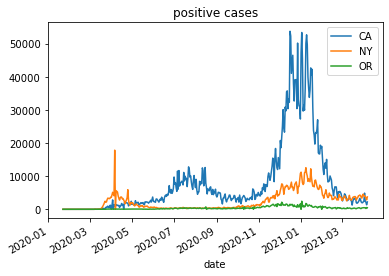

In [5]:
state1 = "CA"
state2 = "NY"
state3 = "OR"
#clean data, replace negatives with 1
x['new_case'][x['new_case'] < 1] = 1
ax = x[x['state'] == state1]['new_case'].plot()
x[x['state'] == state2]['new_case'].plot()
x[x['state'] == state3]['new_case'].plot()
ax.set_title("positive cases")
ax.legend([state1,state2,state3])

### A quick note about plot and axes
note the line above where i said `ax = x[x['state'] == state1]['new_case'].plot()`. Here I'm
grabbing the output of `plot()` and saving it in a variable called `ax` which stands in my mind for Axes. [Axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) objects are the things that hold all the information about the aesthetics of a plot, like how x-tick marks are displayed, titles, legends, etc.. By way of example notice how lower down in the code cell I set the title and legend with the calls
```
ax.set_title("positive cases")
ax.legend([state1,state2,state3])
```

**Exercise:** Change the code block above to make a plot of the number of deaths in each population instead of the number of positive tests.

# Exponential growth
Epidemics, such as the Spanish flu in 1918 and COVID-19 right now, grow in number sensationally quickly. Indeed because humans in the population are immunologically naive, novel viruses can increase in number nearly free from hinderences, particularly at the early stages of an epidemic when infections are rare. 

<img src=imgs/E.coli-colony-growth.gif>

Imagine the following scenario-- imagine that each infected individual in a population infects two other uninfected individuals, and each of them goes on to infect two others, and so on. Imagine that this series of infections would happenly _discreetly_ in time, such that the number of infected individuals on day $t$, call it $N(t)$, starts on day 0 as $N(0) = 1$, and increases such that $N(1) = 2, N(2) = 4,$ etc.

With discrete time steps we call this sort of progression a geometric series where the number of infected individuals in the next time step $N(t+1)$

\begin{equation*}
N(t+1) = N(t)r 
\end{equation*}

where r is the growth rate per step. Let's plot such a series quickly

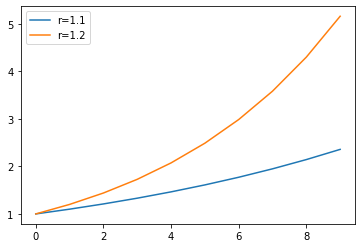

In [6]:
# geometric gowth function
# note i added a default number of timesteps
def geom_growth(init_size, r, timesteps=50):
    res = np.zeros(timesteps)
    res[0] = init_size
    for i in range(1,timesteps):
        res[i] = res[i-1] * r
    return res


plt.plot(geom_growth(1,1.1,10))
plt.plot(geom_growth(1,1.2,10))
plt.legend(labels=('r=1.1','r=1.2'))

so here we have two populations growing at different rates. the first thing to notice is how quickly these are growing. let's plot them for 200 days rather than 10

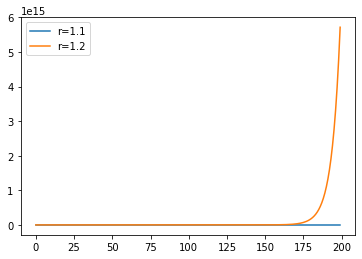

In [7]:
plt.plot(geom_growth(1, 1.1, 200))
plt.plot(geom_growth(1, 1.2, 200))
plt.legend(labels=('r=1.1', 'r=1.2'))

now you can barely see the smaller growth rate population, and the numbers of the blue population have gotten astromonical ($N \sim 10^{15}$)! These sorts of geometric growth processes quickly get out of hand.

## Continuous time
This will come as a shock to you but wild populations don't often have perfectly discrete generations. Instead there's distribution of times at which individuals might reproduce. So let's generalize our model above to one in which we don't need discrete time and instead allow time and use some calculus. 

As above we imagine that $N(t)$ describes the size of our population at time $t$ and that $r$ is the rate of increase in our population size (i.e. the difference between the instantaneous rate of births and the rate of deaths)

In continuous time we write down the differential equation which describes the rate of change of the population such that

\begin{equation*}
\frac{dN}{dt} = rN
\end{equation*}

We can integrate this directly to obtain 

\begin{equation}
N(t) = N(0)e^{rt}
\end{equation}

the last equation is the continuous time analogue of what we got above. Let's write  a quick function for it and plot

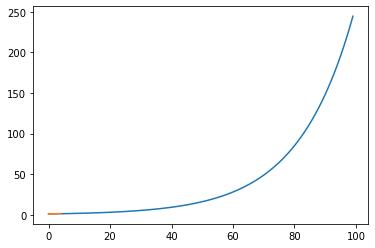

In [8]:
import numpy as np

def exp_growth(init_size, r, timesteps=50):
    x = np.linspace(0,timesteps,100)
    res = np.zeros(100)
    for i in range(0,len(res)):
        res[i] = init_size * np.exp(r*x[i])
    return res
plt.plot(exp_growth(1, 1.1, 5))
plt.plot(geom_growth(1, 1.1, 5))



so our new exponential growth model looks just like our discrete one. that's good because the new equation makes the math really easy!

For a mathematician, the natural thing to do with an exponential function is take it's logarithm. Let's take the log of both sides of the growth model above in equation 1


\begin{equation*}
\log N(t) = \log N(0) + rt
\end{equation*}

if $N(0) = 1$ then $\log 1 = 0$ and we can ignore the first term on the right hand side. then $\log N(t) = rt$ and taking the derivative of both sides with respect to time we obtain the provocative



\begin{equation*}
\frac{d\log N(t)}{dt} = r 
\end{equation*}



so this is saying that the slope of the log of the population size should be a constant and that slope should be the growth rate itself! 

Math is cool.

### Estimate the growth rate from exponential data
Let's try to estimate the growth rate, $r$, by fitting a line to the numbers spit out from out `exp_growth()` function. We might pretend that these data are real data, say from a pandemic

slope estimate 1.0999999999999999 vs true 1.1)


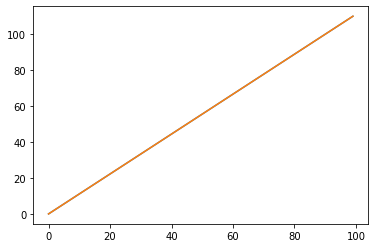

In [9]:
ln = np.log(exp_growth(1, 1.1,100)) #get growth trajectory, take log
x = np.linspace(0,len(ln),len(ln)) # make array for X dimension
slope, intercept = np.polyfit(x,ln,1) #fit a line, y = ax+b
y = (slope * x) + intercept #back calculate y
print(f"slope estimate {slope} vs true 1.1)")
plt.plot(ln)
plt.plot(y)

so that looks perfect! we are able to recover the parameter of interest by fitting a line using `np.polyfit()` to data and estimating the slope. Let's do this on real data next.

# Estimate doubling time of COVID-19 case number from data
Let's work on the CDC data that we brought in earlier. We will restrict ourselves to one state at a time

In [10]:
from matplotlib import pyplot as plt
x = pd.read_csv(query)
x['date']=pd.to_datetime(x['submission_date'])
x = x.sort_values(by='date')
x.set_index(['date'],inplace=True)
#clean data, replace negatives with 1
x['new_case'][x['new_case'] < 1] = 1
x.head()

/Users/adk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
date,,,,,,,,,,,,,,,
2020-01-22,01/22/2020,MI,0,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,01/22/2020,IL,0,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,01/22/2020,HI,0,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2020-01-22,01/22/2020,ND,0,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Not agree
2020-01-22,01/22/2020,IN,0,NaN,NaN,1,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Agree


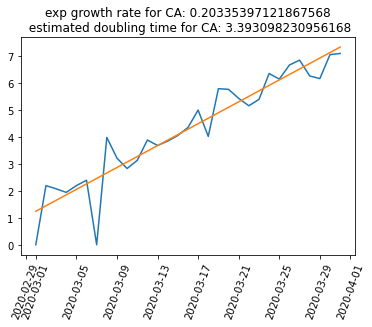

In [11]:
state = 'CA'
march_2020 = x.loc['2020-03-01':'2020-03-31']
ca_log = np.log(march_2020[march_2020['state'] == state]['new_case']) # log tranform counts
day = np.linspace(1,len(ca_log), len(ca_log)) # make array of day numbers
slope, intercept = np.polyfit(day,ca_log,1) # fit log(cases) ~ ax+b
y = (slope * day) + intercept # get best fit line from estimates above
plt.plot(ca_log.index,ca_log) # plot log(cases)
plt.plot(ca_log.index,y) # plot best fit line
plt.title(f"exp growth rate for {state}: {slope}\n estimated doubling time for {state}: {0.69/slope}")
t = plt.xticks(rotation=70) # adjust tick marks on x-axis to look nice


**Exercise:** change the code block above to look at individual states. What is the estimated doubling time in California? In Oregon?


## What a diference a year makes
It's been a wild year of social distancing, facial coverings, and hand washing. Has it made a difference? Well let's compare estimated rates of COVID case growth between March 2020 and March 2021. Below I've done this for California.

Note the super convenient index below that works with dates

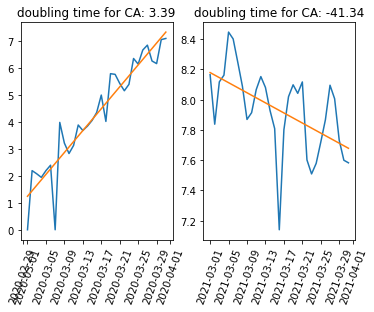

In [12]:
older = x.loc['2020-03-01':'2020-03-31']
recent = x.loc['2021-03-01':'2021-03-31']
state = 'CA'
data = [older, recent]
fig, ax = plt.subplots(nrows=1, ncols=2)
i = 0
for z in data:
    ca_log = np.log(z[z['state'] == state]['new_case']) # log tranform counts
    day = np.linspace(1,len(ca_log),len(ca_log)) # make array of day numbers
    slope, intercept = np.polyfit(day,ca_log,1) # fit log(cases) ~ ax+b
    y = (slope * day) + intercept # get best fit line from estimates above
    ax[i].plot(ca_log.index,ca_log) # plot log(cases)
    ax[i].plot(ca_log.index,y) # plot best fit line
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(70)
    ax[i].set_title(f"doubling time for {state}: {round(0.69/slope, 2)}")
    i+=1

# Numpy and Matplotlib-- essentials of scientific programming in python

Let's dive a little deeper now into our tools before we move on


## Numpy
Numpy is *the* core numerical library for technical programming in Python. In particular it implements fast routines for multidimensional arrays (think matrices or tensors). Much of our work for the remainder of this class will depend on numpy but in an indirect way, so you will not need to become an expert. I will not delve too deep into the weeds of numpy but if you are interested in tackling it head on, go have a look at the [official numpy user guide](https://docs.scipy.org/doc/numpy/user/index.html)

### Numpy Arrays
The whole reason we use numpy is because it provides an amazing datatype--- a multidimensional array or n-dimensional array called `ndarray`. These numpy arrays are sort of like lists, in that you can index in to them to find elements, but they are much, much more efficient. /As part of this efficiency we need to define the datatype of an array, or as the opbject calls it the `dtype`. Arrays can only take elements of a particular data type (all `int64` for instance) and they can be of arbitrary shape. For instance:

In [13]:
import numpy as np

x = np.array([1,3,4])
print(type(x),x.dtype)

print(x[0],x[2])

print(x.shape)

<class 'numpy.ndarray'> int64
1 4
(3,)


here `.shape` is returning the dimensions of the array. in this case we have a column vector of 3 rows

In [14]:
## input the matrix
##
## 1 2 3
## 4 5 6
#
y = np.array([[1,2,3],[4,5,6]])
print(y.shape) # two rows, three columns
print(y[0,0],y[1,1])


(2, 3)
1 5


Initializing numpy arrays is easy and there are many functions available to give common kinds of matrices.

In [15]:

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
print("--------")     #          [ 0.  0.]]"

b = np.ones((1,3))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1. 1.]]"
print("--------")
c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"
print("--------")
d = np.eye(4)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0. 0. 0.]
                      #          [ 0.  1. 0. 0.]
                      #          [ 0.  0. 1. 0.]
                      #          [ 0.  0. 0. 1.]]"
print("--------")
e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
--------
[[1. 1. 1.]]
--------
[[7 7]
 [7 7]]
--------
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
--------
[[0.16496843 0.67791262]
 [0.14946061 0.42235365]]


In [16]:
print(b)
b2 = np.ones((3))
b[0,0]
b2[0]
b2.shape

[[1. 1. 1.]]


(3,)

# Buit in numpy functions
One of the most useful parts of numpy are the built in functions. We can leverage these for all kinds of things, saving us from writing code and speeding up things as we go along. 

A classic that you will use again and again will be things like `sum` or `mean`. For instance

In [17]:
x = np.array([11, 12])
print(x.sum())
print(x.mean())

23
11.5


In [18]:
# make array of 1000 normally distributed random
# numbers with mean -0.5, and stdev 1.
# note we are using numpy's random number library
x = np.random.normal(-0.5,1,1000)
print(x.mean())
print(x.std())

-0.5287796106027287
1.0034079371618347


**Exercise:** change the mean of the normal distribution above and confirm that numpy is giving you the correct mean back. If you store the new array in a variable called `y` you can plot a histogram comparing the new and old arrays using the code below

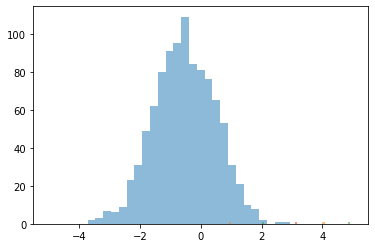

In [19]:
from matplotlib import pyplot as plt

bins = np.linspace(-5, 5, 40)
# y = np.random.normal(0.5,1,1000) # comment out if you have your own y
plt.hist(x, bins, alpha=0.5, label='x')
h= plt.hist(y, bins, alpha=0.5, label='y')

this brings us to a very important point in any computational work that until this point we've been mostly skirting-- the visual display of quantitative information.

## "Above all else show the data" -- Edward Tufte
For the remainder of this lesson we are going to spend time with creating plots using the main tool in python `matplotlib`.  

We can use it, in combination with numpy, pandas, and other libraries to create beautiful, publication quality images right in our jupyter notebooks. Here we will use it mainly with numbers generated via numpy, but you've already used it a bit for last week's problem set. The full documentation for matplotlib can be found [here](https://matplotlib.org/)

In [20]:
import numpy as np
from matplotlib import pyplot as plt 

The main interface to matplotlib is via `pyplot` which wraps the matplotlib code into an interface that behaves like Matlab (a popular coding language/environment). Frankly, all of this is a bit opaque, but for much of what we will do we will work through the pyplot paradigm. 

Let's start by ploting the sine and cosine functions

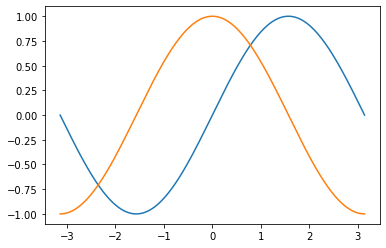

In [21]:
x = np.linspace(-np.pi,np.pi,256) #get an array of 256 evenly spaced values between -pi and pi
c = np.cos(x) # calculate cos(x)
s = np.sin(x) # calculate sin(x)

plt.plot(x,s) # create plot
plt.plot(x,c)
plt.show()  # show the plot

We can very simply change the color of the lines if we like, and their thickness, etc.

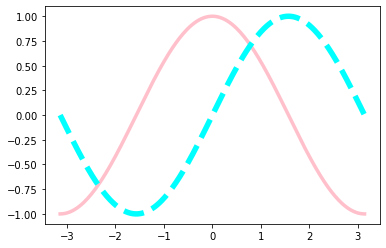

In [22]:
plt.plot(x, c, color="pink", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="cyan",  linewidth=5.5, linestyle="--")
plt.show()

Perhaps we are interested in limiting the range of the plot. We can do this using using the `xlim()` or `ylim()` functions which take as input a min and a max value for the limitation. Let's add a bit of space to our plot on the y-axis to make the curves a bit smaller in their framing (note we could of course do this on the x-axis too)

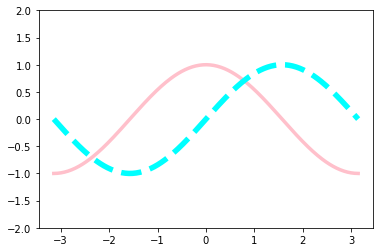

In [23]:
plt.plot(x, c, color="pink", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="cyan",  linewidth=5.5, linestyle="--")
plt.ylim(-2,2)
plt.show()

Matplotlib offers a TON of flexibility for our images. Let's add to this pretty x-tick labels that show coordinates in units of $\pi$. To do this we will rely upon matplotlib's built in `mathtext` mode which will render TeX like markup into pretty images. The full documentation for `mathtext` can be found [here](https://matplotlib.org/users/mathtext.html#mathtext-tutorial)

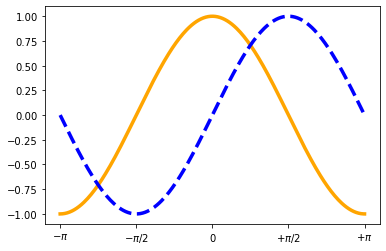

In [24]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format
plt.show()

Let's add a legend to the figure above

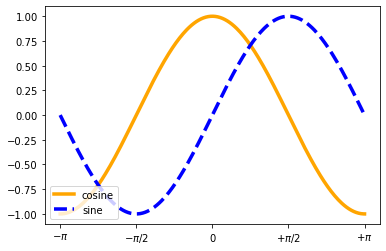

In [25]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-", label="cosine")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--", label="sine")
plt.legend(loc='lower left', frameon=True)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format
plt.show()

A neat thing that matplotlib will allow us to do is change the position of the "spines" of our plot, the lines that delineate the axes that we are plotting. Let's move the spines to positions that might be more familiar in the setting of a math class. You can read about spines [here](https://matplotlib.org/api/spines_api.html#matplotlib.spines)

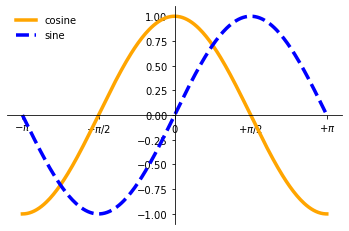

In [26]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-", label="cosine")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--", label="sine")
plt.legend(loc='upper left', frameon=False)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format

### move the spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.savefig("myimg.pdf")

## Some examples of the kinds of plots we can make
Now that we've gone through some of the basics, I'd like to do just a quick whirlwind tour of some of the basic plot types that we can create with matplotlib alone (we will eventually get to the seaborn package which opens up further possibilities)

### Scatter plots
The most common sort of plot you might make is a scatter plot. Let's use the `numpy.random` module to create multivariate normal random numbers and plot those. We will do this for two covariance matrices, one more correlated than the other


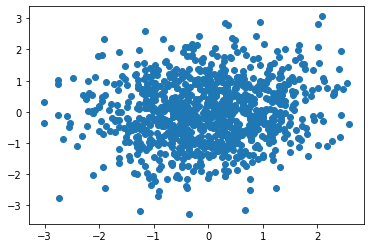

In [27]:
mean = np.array([0,0])
cov1 = np.array([[1.0,0.1],[0.1,1.0]]) #low covariance between x & y
x = np.random.multivariate_normal(mean, cov1, size=1000)
plt.scatter(x[:,0],x[:,1])
plt.show()

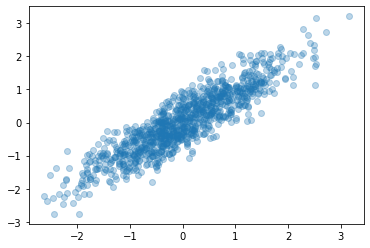

In [28]:
mean = np.array([0,0])
cov1 = np.array([[1.0,0.9],[0.9,1.0]]) # high covariance between x & y
x = np.random.multivariate_normal(mean, cov1, size=1000)
plt.scatter(x[:,0],x[:,1],alpha=0.3) # I've set alpha < 1 so that points are a bit transparent
plt.show()

## Contour plots

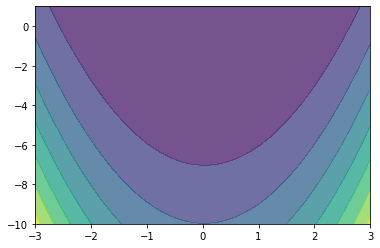

In [29]:
def banana_function(x, y):
    a = 1
    b = 2
    return((a-x)**2 + (b*(y - x**2)**2))

n = 512
x = np.linspace(-3, 3, n)
y = np.linspace(-10, 1, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, banana_function(X, Y), 8, alpha=.75, cmap='viridis')
#C = plt.contour(X, Y, banana_function(X, Y), 8, colors='black')
plt.show()

### histograms

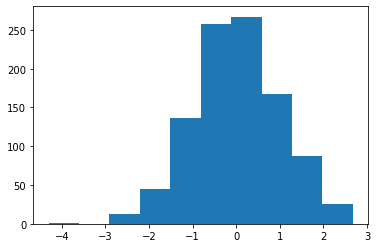

In [30]:
# choose 1000 normal RVs
x = np.random.normal(0,1,1000)
plt.hist(x)
plt.show()

## subplots
subplots in matplotlib take some care. in particular subplots are 1-indexed rather than the familiar zero indexing in the rest of the python language (why would you do this? I have no idea). the basic function `subplots()` takes two integers specifying the *number of rows* in the array of plots, the *number of columns* in the array, and returns a fig and an Axes object just like `plot()`. I'll give two examples, a simple one and a more complex one.

First lets plot two scatterplots side by side

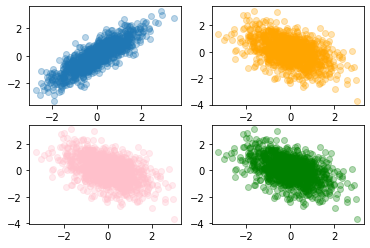

In [31]:
fig,ax = plt.subplots(2,2) #returns 1 row and 2 columns of plots
cov = np.array([[1.0,0.85],[0.85,1.0]]) #low covariance between x & y
x = np.random.multivariate_normal([0,0], cov, size=1000)
ax[0,0].scatter(x[:,0],x[:,1], alpha= 0.3)

cov[0,1]=cov[1,0]=-0.5
x = np.random.multivariate_normal([0,0], cov, size=1000)
ax[0,1].scatter(x[:,0],x[:,1], alpha= 0.3,color="orange")
ax[1,0].scatter(x[:,0],x[:,1], alpha= 0.3,color="pink")
ax[1,1].scatter(x[:,0],x[:,1], alpha= 0.3,color="green")
plt.show()

the second more complex example uses `plt.Gridspec()` to lay out a grid of subplots and the the of so subtlely different `subplot()` to call each of the positions laid out in our grid.

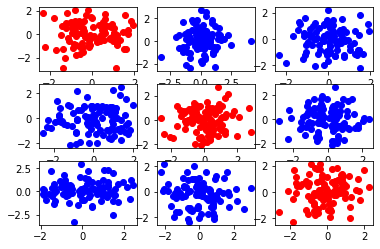

In [32]:
## quiver plot on the bottom

#scatter on the top left
grid = plt.GridSpec(3, 3, hspace=0.2, wspace=0.2)
for i in range(3):
    for j in range(3):
        plt.subplot(grid[i, j])
        if i == j:
            col = "red"
        else:
            col = "blue"
        plt.scatter(np.random.normal(0,1,100),np.random.normal(0,1,100),color=col)
#hist on the top right
#plt.subplot(grid[0, 1])
#plt.hist(x)
#plt.subplot(grid[1,0:2:2])
#X, Y = np.meshgrid(range(0,6), range(8))
#plt.quiver(X, Y)
plt.show()

### IMSHOW
`imshow` allows us to display images, like .jpg files. Because images are represented as numerical arrays in practice we can use the same tool to create visualizations of any sort of data

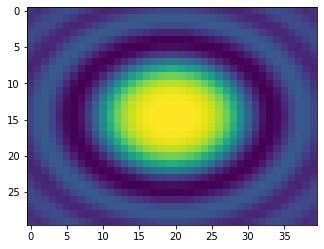

In [33]:
def f(x, y):
     return(np.sin(x**2 + y**2) / (x**2 + y**2))
n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))